In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

import os

# _FOLDER = "/home/ac1jjgg/MOGP_GPyTorch/FiveCancersDataSet/"
_FOLDER = "/home/juanjo/Work_Postdoc/my_codes_postdoc/GPyTorch_Models/FiveCancersDataSet/"
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
df_Feature_Names_Melanoma = pd.read_csv(_FOLDER + "Feature_Names_Melanoma.csv")

In [2]:
List_Names_Melanoma = list(df_Feature_Names_Melanoma.values[:,0])

In [3]:
List_Names_Melanoma

['AHCTF1_mut',
 'AKAP9_mut',
 'ANK3_mut',
 'APC_mut',
 'ARFGAP3_mut',
 'ARHGAP29_mut',
 'ARID1A_mut',
 'ARID2_mut',
 'ARID4A_mut',
 'ATM_mut',
 'B2M_mut',
 'BAP1_mut',
 'BAZ2B_mut',
 'BPTF_mut',
 'BRAF_mut',
 'BRCA2_mut',
 'BRWD1_mut',
 'CDKN2A_mut',
 'CEP290_mut',
 'CHEK2_mut',
 'CLASP2_mut',
 'CLSPN_mut',
 'CREBBP_mut',
 'CTCF_mut',
 'CTNNB1_mut',
 'CUL2_mut',
 'CUX1_mut',
 'ELF1_mut',
 'EP300_mut',
 'EZH2_mut',
 'FAM123B_mut',
 'FGFR2_mut',
 'GNA11_mut',
 'HDAC9_mut',
 'HRAS_mut',
 'INPP4A_mut',
 'INPPL1_mut',
 'KDM6A_mut',
 'LAMA2_mut',
 'LPHN2_mut',
 'LRP6_mut',
 'MAP2K1_mut',
 'MAP3K4_mut',
 'MCM8_mut',
 'MECOM_mut',
 'MGA_mut',
 'MLL2_mut',
 'MLL3_mut',
 'MYH11_mut',
 'MYH14_mut',
 'MYH9_mut',
 'NF1_mut',
 'NRAS_mut',
 'PABPC3_mut',
 'PCDH18_mut',
 'PIK3R1_mut',
 'PLCB1_mut',
 'PSIP1_mut',
 'PTEN_mut',
 'RAC1_mut',
 'RB1_mut',
 'ROBO2_mut',
 'RPL5_mut',
 'SEC31A_mut',
 'SETD2_mut',
 'SMARCA1_mut',
 'SMARCA4_mut',
 'SRGAP1_mut',
 'STAG1_mut',
 'STAG2_mut',
 'STIP1_mut',
 'STK11_m

In [3]:
#List_Names_Melanoma[14]
#np.where(df_Feature_Names_Melanoma=="BRAF_mut")
#np.where(df_Feature_Names_Melanoma=="loss:cnaPANCAN65")
np.where(df_Feature_Names_Melanoma=="surface_area")
#np.where(df_Feature_Names_Melanoma=="loss:cnaPANCAN30 (LARP4B)")

(array([381]), array([0]))

(65, 385)


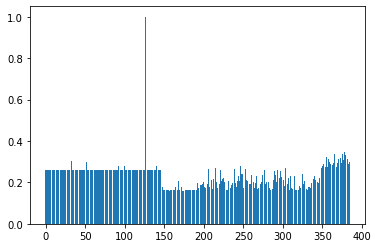

In [4]:
N = 65
Pfeatures = df_Feature_Names_Melanoma.shape[0]
#df_melanoma = pd.read_csv(_FOLDER+name_for_KLrelevance)
#df_KLRelevance_Mtx = pd.read_csv(_FOLDER+'Relevance_KL_HPC_Melanoma.txt', names=["col"+str(i) for i in range(df_train_No_MolecForm.shape[0]+1)])
df_KLRelevance_Mtx_MOGP = pd.read_csv(_FOLDER+'Best_Model_Melanoma/Relevance_Melanoma_ExactMOGP.txt', names=["col"+str(i) for i in range(N+1)])
#df_KLRelevance_Mtx = pd.read_csv(_FOLDER+'Best_Model_Melanoma_SOGP_IC50/Relevance_Melanoma_SOGP_IC50.txt', names=["col"+str(i) for i in range(N+1)])

df_sorted_MOGP = df_KLRelevance_Mtx_MOGP.sort_values(by=['col0'])
KL_Relevance_MOGP = df_sorted_MOGP.values
KL_Relevance_MOGP = KL_Relevance_MOGP[:,1:].T  #We getrid of first index position
print(KL_Relevance_MOGP.shape)
KL_p_MOGP = np.mean(KL_Relevance_MOGP,0)
plt.bar(np.arange(0,Pfeatures),KL_p_MOGP/KL_p_MOGP.max())

df_KLR_With_Column_Names_MOGP = pd.DataFrame(KL_p_MOGP[None,:]/KL_p_MOGP.max(), columns=List_Names_Melanoma)
df_KL_Col_Names_Sorted_MOGP = df_KLR_With_Column_Names_MOGP.sort_values(by= 0,axis=1,ascending = False)

In [5]:
np.mean(KL_Relevance_MOGP,0)
#df_sorted_MOGP
#df_KLRelevance_Mtx_MOGP
#df_KLRelevance_Mtx
#df_sorted["col0"].values == np.arange(0,385)
#df_sorted["col0"].values

array([1241.21815385, 1240.148     , 1240.87615385, 1241.28307692,
       1242.18938462, 1242.16569231, 1241.79769231, 1240.66230769,
       1241.54030769, 1241.42523077, 1240.39030769, 1239.81430769,
       1241.32753846, 1241.38030769, 1240.43461538, 1241.21184615,
       1241.80738462, 1241.512     , 1240.13830769, 1240.50661538,
       1240.90815385, 1240.06876923, 1240.99153846, 1241.598     ,
       1242.984     , 1241.65876923, 1241.44138462, 1241.99553846,
       1240.94492308, 1241.10723077, 1241.26446154, 1240.82723077,
       1241.55692308, 1444.706     , 1241.45169231, 1241.544     ,
       1326.45338462, 1240.31507692, 1242.302     , 1240.53138462,
       1242.09876923, 1241.73738462, 1240.83692308, 1241.84907692,
       1241.07076923, 1241.85446154, 1242.532     , 1239.13043077,
       1241.17215385, 1241.01338462, 1241.72738462, 1242.07276923,
       1434.05630769, 1239.84353846, 1240.92523077, 1241.35861538,
       1241.12876923, 1240.60353846, 1241.154     , 1240.90538

In [6]:
#df_KLRelevance_Mtx
#df_sorted
#df_sorted.values.shape
df_KLR_With_Column_Names_MOGP[df_KLR_With_Column_Names_MOGP.columns[0:15]]

,AHCTF1_mut,AKAP9_mut,ANK3_mut,APC_mut,ARFGAP3_mut,ARHGAP29_mut,ARID1A_mut,ARID2_mut,ARID4A_mut,ATM_mut,B2M_mut,BAP1_mut,BAZ2B_mut,BPTF_mut,BRAF_mut
0,0.25912,0.258896,0.259048,0.259133,0.259323,0.259318,0.259241,0.259004,0.259187,0.259163,0.258947,0.258827,0.259143,0.259154,0.258956


In [7]:
#Top 30 most important features out of 826 features
df_KL_Col_Names_Sorted_MOGP[df_KL_Col_Names_Sorted_MOGP.columns[0:50]].min()

loss:cnaPANCAN65                                1.000000
surface_area                                    0.347396
heavy_atom_count                                0.345050
loss:cnaPANCAN417                               0.340220
chr19:49315545-49315765(BCAT2)_HypMET           0.338861
chr2:183731819-183732093(FRZB)_HypMET           0.337930
F                                               0.335512
chr17:46691520-46692097(HOXB8)_HypMET           0.335020
bond_stereo_count                               0.334287
chr10:93392667-93393147(PPP1R3C)_HypMET         0.321150
chr17:44656490-44657494(ARL17A)_HypMET          0.319615
xlogp                                           0.319602
chr6:291948-292839(DUSP22)_HypMET               0.314867
Cl                                              0.314238
3bonds                                          0.314199
chr15:30685087-30685891(CHRFAM7A)_HypMET        0.312582
S                                               0.310830
molecular_weight               

In [8]:
#Top 30 least important features out of 826 features
df_KL_Col_Names_Sorted_MOGP[df_KL_Col_Names_Sorted_MOGP.columns[-50:]].min()

loss:cnaPANCAN381 (ARFGAP3)                             0.163009
loss:cnaPANCAN368                                       0.162706
gain:cnaPANCAN411 (BLM,CRTC3,FANCI,IDH2,NR2F2,PCSK6)    0.161894
loss:cnaPANCAN386                                       0.161875
loss:cnaPANCAN118 (ZFHX3)                               0.161430
loss:cnaPANCAN119                                       0.161397
loss:cnaPANCAN94                                        0.161390
loss:cnaPANCAN93                                        0.161376
gain:cnaPANCAN121 (ACTB,CARD11,PMS2,RAC1)               0.161320
gain:cnaPANCAN122 (AHR,HDAC9)                           0.161299
loss:cnaPANCAN97                                        0.161250
loss:cnaPANCAN95                                        0.161245
loss:cnaPANCAN96                                        0.161241
loss:cnaPANCAN98                                        0.161220
loss:cnaPANCAN101                                       0.161203
gain:cnaPANCAN123        

### Check for BRAF ranking position

In [9]:
np.where(df_KL_Col_Names_Sorted_MOGP.columns=="BRAF_mut")

(array([169]),)

# Analysis for SOGP when training over IC50

(65, 385)


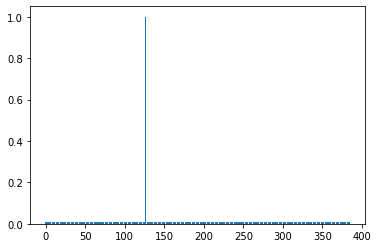

In [34]:
which_model = "m81"
N = 65
Pfeatures = df_Feature_Names_Melanoma.shape[0]
#df_melanoma = pd.read_csv(_FOLDER+name_for_KLrelevance)
#df_KLRelevance_Mtx = pd.read_csv(_FOLDER+'Relevance_KL_HPC_Melanoma.txt', names=["col"+str(i) for i in range(df_train_No_MolecForm.shape[0]+1)])
#df_KLRelevance_Mtx = pd.read_csv(_FOLDER+'Best_Model_Melanoma/Relevance_Melanoma_ExactMOGP.txt', names=["col"+str(i) for i in range(N+1)])
df_KLRelevance_Mtx = pd.read_csv(_FOLDER+'Best_Model_Melanoma_SOGP_IC50/Relevance_Melanoma_SOGP_IC50_'+which_model+'.txt', names=["col"+str(i) for i in range(N+1)])

df_sorted = df_KLRelevance_Mtx.sort_values(by=['col0'])
KL_Relevance = df_sorted.values
KL_Relevance = KL_Relevance[:,1:].T  #We getrid of first index position
print(KL_Relevance.shape)
KL_p = np.mean(KL_Relevance,0)
plt.bar(np.arange(0,Pfeatures),KL_p/KL_p.max())

df_KLR_With_Column_Names = pd.DataFrame(KL_p[None,:]/KL_p.max(), columns=List_Names_Melanoma)
df_KL_Col_Names_Sorted = df_KLR_With_Column_Names.sort_values(by= 0,axis=1,ascending = False)

In [35]:
Pfeatures
#KL_p/KL_p.max()
#df_sorted
#df_sorted
#df_KLRelevance_Mtx
#df_sorted["col0"].values == np.arange(0,385)
#df_sorted["col0"].values

385

In [36]:
#df_KLRelevance_Mtx
#df_sorted
#df_sorted.values.shape
df_KLR_With_Column_Names[df_KLR_With_Column_Names.columns[0:15]]

,AHCTF1_mut,AKAP9_mut,ANK3_mut,APC_mut,ARFGAP3_mut,ARHGAP29_mut,ARID1A_mut,ARID2_mut,ARID4A_mut,ATM_mut,B2M_mut,BAP1_mut,BAZ2B_mut,BPTF_mut,BRAF_mut
0,0.006903,0.006634,0.00663,0.006638,0.006731,0.006731,0.006963,0.007178,0.006653,0.006598,0.006726,0.006645,0.006727,0.006868,0.007818


In [37]:
#Top 30 most important features out of 385 features
df_KL_Col_Names_Sorted[df_KL_Col_Names_Sorted.columns[0:50]].min()

loss:cnaPANCAN65                                1.000000
loss:cnaPANCAN390                               0.010291
gain:cnaPANCAN367 (ARFGAP1,GNAS)                0.009469
loss:cnaPANCAN116                               0.009313
PIK3R1_mut                                      0.009261
gain:cnaPANCAN61                                0.009210
loss:cnaPANCAN162                               0.009090
HDAC9_mut                                       0.008890
loss:cnaPANCAN417                               0.008694
NRAS_mut                                        0.008643
chr6:291948-292839(DUSP22)_HypMET               0.008617
loss:cnaPANCAN45                                0.008581
INPPL1_mut                                      0.008560
loss:cnaPANCAN79                                0.008436
CHEK2_mut                                       0.008394
WHSC1L1_mut                                     0.008347
loss:cnaPANCAN35 (CUL2)                         0.008343
Cl                             

In [38]:
#Top 30 least important features out of 385 features
df_KL_Col_Names_Sorted[df_KL_Col_Names_Sorted.columns[-50:]].min()

loss:cnaPANCAN414                            0.006538
loss:cnaPANCAN413                            0.006538
loss:cnaPANCAN412                            0.006538
gain:cnaPANCAN178                            0.006532
loss:cnaPANCAN326 (SOX9)                     0.006531
loss:cnaPANCAN197                            0.006522
loss:cnaPANCAN196                            0.006522
gain:cnaPANCAN244                            0.006513
gain:cnaPANCAN245 (MECOM)                    0.006513
loss:cnaPANCAN155                            0.006502
loss:cnaPANCAN149                            0.006502
loss:cnaPANCAN150 (PTGS1)                    0.006502
loss:cnaPANCAN152                            0.006502
loss:cnaPANCAN153 (ABL1)                     0.006502
loss:cnaPANCAN154                            0.006502
loss:cnaPANCAN160                            0.006502
loss:cnaPANCAN156                            0.006502
loss:cnaPANCAN157                            0.006502
loss:cnaPANCAN161 (NOTCH1)  

### Check for BRAF ranking position

In [39]:
np.where(df_KL_Col_Names_Sorted.columns=="BRAF_mut")

(array([24]),)

In [40]:
List_Names_Melanoma

['AHCTF1_mut',
 'AKAP9_mut',
 'ANK3_mut',
 'APC_mut',
 'ARFGAP3_mut',
 'ARHGAP29_mut',
 'ARID1A_mut',
 'ARID2_mut',
 'ARID4A_mut',
 'ATM_mut',
 'B2M_mut',
 'BAP1_mut',
 'BAZ2B_mut',
 'BPTF_mut',
 'BRAF_mut',
 'BRCA2_mut',
 'BRWD1_mut',
 'CDKN2A_mut',
 'CEP290_mut',
 'CHEK2_mut',
 'CLASP2_mut',
 'CLSPN_mut',
 'CREBBP_mut',
 'CTCF_mut',
 'CTNNB1_mut',
 'CUL2_mut',
 'CUX1_mut',
 'ELF1_mut',
 'EP300_mut',
 'EZH2_mut',
 'FAM123B_mut',
 'FGFR2_mut',
 'GNA11_mut',
 'HDAC9_mut',
 'HRAS_mut',
 'INPP4A_mut',
 'INPPL1_mut',
 'KDM6A_mut',
 'LAMA2_mut',
 'LPHN2_mut',
 'LRP6_mut',
 'MAP2K1_mut',
 'MAP3K4_mut',
 'MCM8_mut',
 'MECOM_mut',
 'MGA_mut',
 'MLL2_mut',
 'MLL3_mut',
 'MYH11_mut',
 'MYH14_mut',
 'MYH9_mut',
 'NF1_mut',
 'NRAS_mut',
 'PABPC3_mut',
 'PCDH18_mut',
 'PIK3R1_mut',
 'PLCB1_mut',
 'PSIP1_mut',
 'PTEN_mut',
 'RAC1_mut',
 'RB1_mut',
 'ROBO2_mut',
 'RPL5_mut',
 'SEC31A_mut',
 'SETD2_mut',
 'SMARCA1_mut',
 'SMARCA4_mut',
 'SRGAP1_mut',
 'STAG1_mut',
 'STAG2_mut',
 'STIP1_mut',
 'STK11_m